In [1]:
import cv2 as cv
import numpy as np
import scipy.signal as signal

### Laplacian Filter

This exercise wants to show the effects of applying a laplacian filter.
Here will be made use of openCV tools to apply kernels and show the images, before and after the changes.

#### Defining Kernels:
Applying a laplacian filter implies to make use of the second derivate in x and y axes.
$$ \nabla^{2}f = [f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)]-4f(x,y) $$


This is equal to have a kernel like shown below:

$$ K = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$


If it is wwanted to include the borders also, it can be completed the last kernel:

$$ K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$


By last, it is used to apply a kernel that adds the original image's background to the effect of extract the high frequency components:

$$ K = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -5 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

                            or

$$ K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -9 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$

### Test Image: Moon

The image under test is the next one


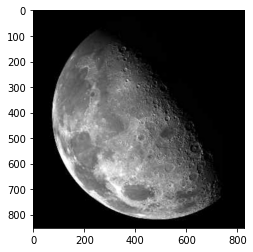

In [51]:
import matplotlib.pyplot as plt
moon = cv.imread('../data/Images/moon.png', cv.IMREAD_GRAYSCALE)
plt.imshow(moon, cmap = 'gray')
#cv.imshow(winname = "Moon with filter 1", mat = moon)

## Laplacian without diagonals

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


Text(0.5, 1.0, 'moon original vs filtered and scaled')

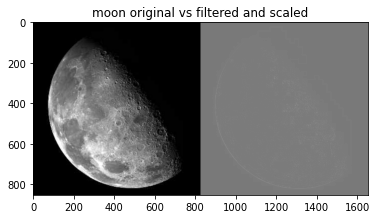

In [43]:
K1 = np.array([[0.0, 1.0, 0.0], [1.0, -4.0, 1.0], [0.0, 1.0, 0.0]])
moon_1 = cv.filter2D(moon,-1,K1)
cv.imshow(winname = 'just filtered', mat=moon_1)
cv.waitKey(0)
print(K1)

##cambio de escala
moon_1_scaled = (moon_1 * 0.5) + 122.5
moon_vs_filter_scaled = np.hstack((moon, moon_1_scaled))
plt.figure()
plt.imshow(moon_vs_filter_scaled, cmap='gray')
plt.title("moon original vs filtered and scaled")



Text(0.5, 1.0, 'moon original vs filtered and scaled')

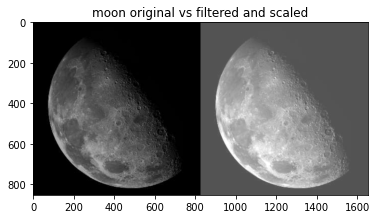

In [45]:
moon_filtered_back = np.hstack((moon, moon_1_scaled + moon))
plt.figure()
plt.imshow(moon_filtered_back, cmap ='gray')
plt.title("moon original vs filtered and scaled and background")



In [48]:
##adding background
K2 = np.array([[0.0, 1.0, 0.0], [1.0, -5.0, 1.0], [0.0, 1.0, 0.0]])*-1
moon_2 = cv.filter2D(moon,-1,K2)
moon_show_2 = np.hstack((moon, moon_2))
cv.imshow(winname = 'show2', mat=moon_2)
cv.waitKey(0)
cv.imshow(winname = 'original', mat=moon)
cv.waitKey(0)
print(K2)


[[-0. -1. -0.]
 [-1.  5. -1.]
 [-0. -1. -0.]]


#### With Diagonals...

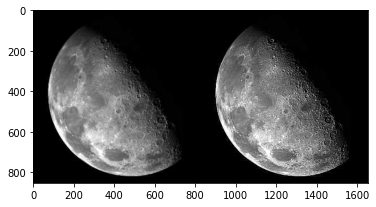

In [50]:
K3 = np.array([[1.0, 1.0, 1.0], [1.0, -8.0, 1.0], [1.0, 1.0, 1.0]])
moon_3 = cv.filter2D(moon,-1,K3)
moon_show_3 = np.hstack((moon_1, moon_3))
cv.imshow(winname = 'no diag vs diag', mat=moon_show_3)
cv.waitKey(0)

##background
K4 = np.array([[1.0, 1.0, 1.0], [1.0, -9.0, 1.0], [1.0, 1.0, 1.0]])*-1
moon_4 = cv.filter2D(moon,-1,K4)
moon_show_4 = np.hstack((moon, moon_4))
cv.imshow(winname = 'original vs laplacian with diag and back', mat=moon_show_4)
cv.waitKey(0)
plt.figure()

plt.imshow(moon_show_4, cmap='gray')